trying to find the individual symbols in an image



In [13]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
cv2.__version__

'4.2.0'

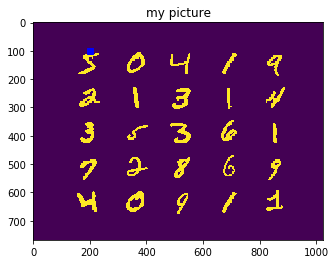

In [66]:
src = cv2.imread('random_digits_spread.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh)
plt.plot(200,100, 'bs')
plt.title("my picture")
plt.show()

so now we have a binary image, lets find the connected components

In [23]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S, cv2.CCL_DEFAULT)


in the following graph, each color represents a different component, the number of labels is 26 as the background plane is also one label

number of labels 26


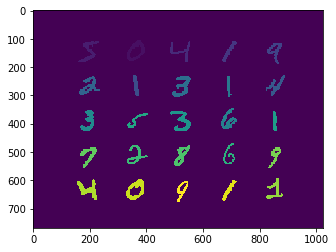

In [58]:
print("number of labels " + str(num_labels))
elevated_labels = [l * 10 for l in labels] # scaling them apart, does not make a difference visually
plt.imshow(elevated_labels)
plt.show()

now we are trying to isolate only one number given the labels. we can use the threshold to filter out numbers (bzt that is not that useful)

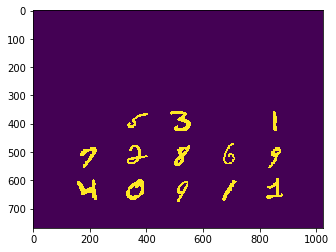

In [70]:
_, second = cv2.threshold(labels.astype('uint8'), 12, 255, cv2.THRESH_BINARY)
plt.imshow(second)

now we are getting the stats from the algorithm where the upper left corner of each number is supposed to be and plot that ontop of our original picture

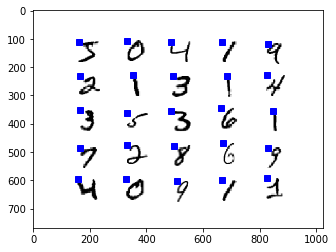

In [71]:
plt.imshow(src)
for i in range(1, num_labels):
    plt.plot(stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], 'bs')
plt.show()